# Mohammad Adil Khan

# Task-5 To Explore Buisness Analytics On Superstore Dataset

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
corr=df.loc[:,['Sales','Quantity','Discount','Profit']].corr()
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


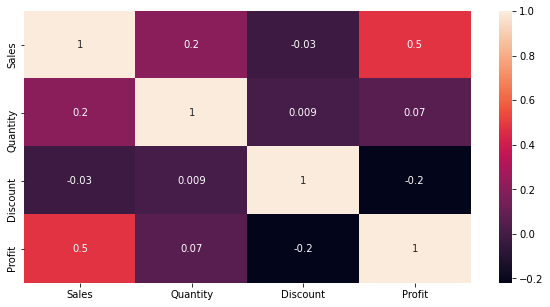

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,fmt='.1g')

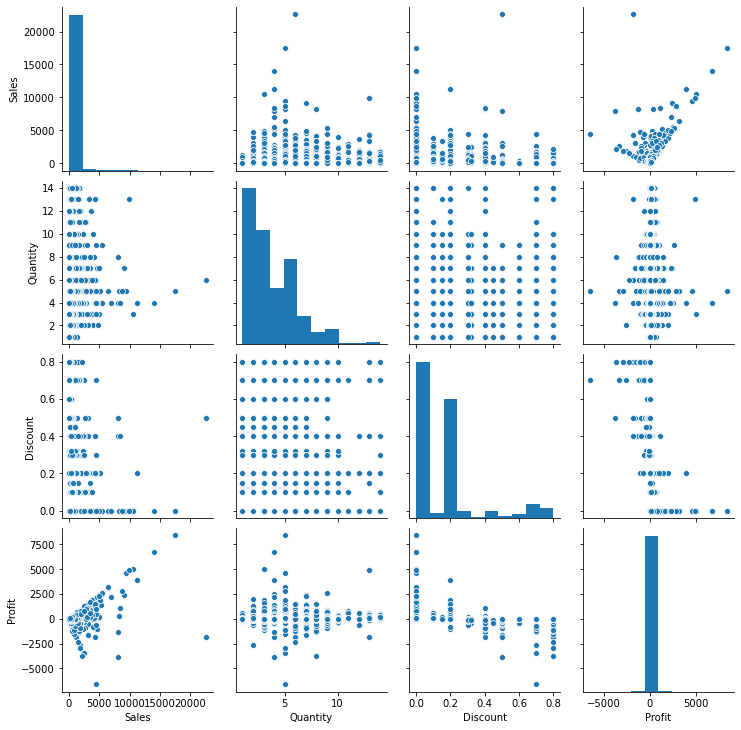

In [8]:
#Relation Analysis
# Pair_plot
financial=df.loc[:,['Sales','Quantity','Discount','Profit']]
sns.pairplot(financial)

# 4. Exploratory Data Analysis and Visulization
4.1 What are total Sales and Profits of the company?

In [9]:
Sales_and_Profits = df.groupby("Segment").sum().iloc[:,[1,-1]].sum()
round(Sales_and_Profits,2) # Rounding Numericala entries to 2 decimal places

Sales     2297200.86
Profit     286397.02
dtype: float64

# Total Sales = 2,296,195.56 USD


# Total Profits = 286,241.42 USD

In [10]:
Top_10_Sales = df.groupby("State").Sales.sum().nlargest(n =10)
Top_10_Profits = df.groupby("State").Profit.sum().nlargest(n =10)

In [11]:
df['City'].value_counts().head(10)

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: City, dtype: int64

In [12]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

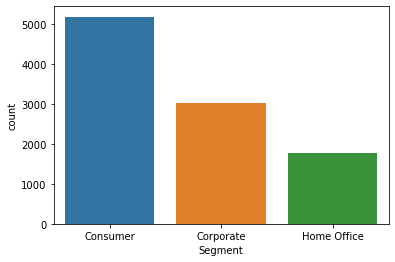

In [13]:
sns.countplot('Segment',data=df)

In [14]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

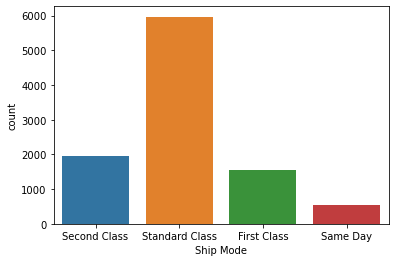

In [15]:
sns.countplot('Ship Mode',data=df)

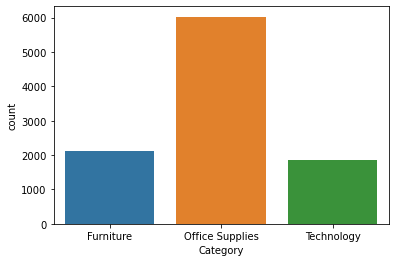

In [16]:
sns.countplot('Category',data=df)

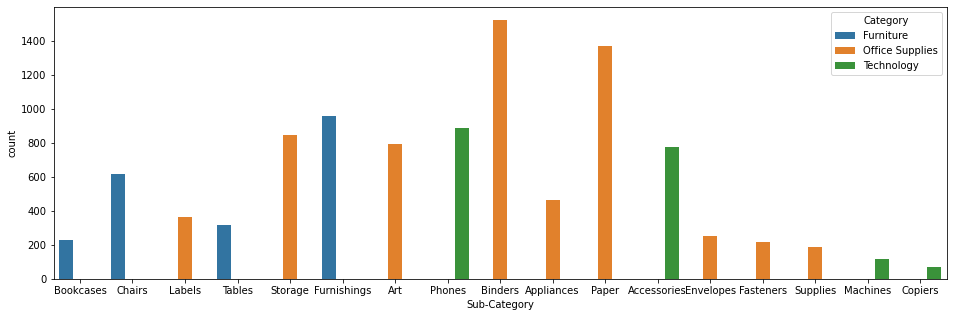

In [17]:
plt.figure(figsize=(16,5))
sns.countplot('Sub-Category',data=df,hue='Category')

# Top 10 States by Sales:
'California', 'New York', 'Texas','Pennsylvania', 'Washington', 'Illinois','Florida', 'Ohio', 'Michigan', 'Virginia'

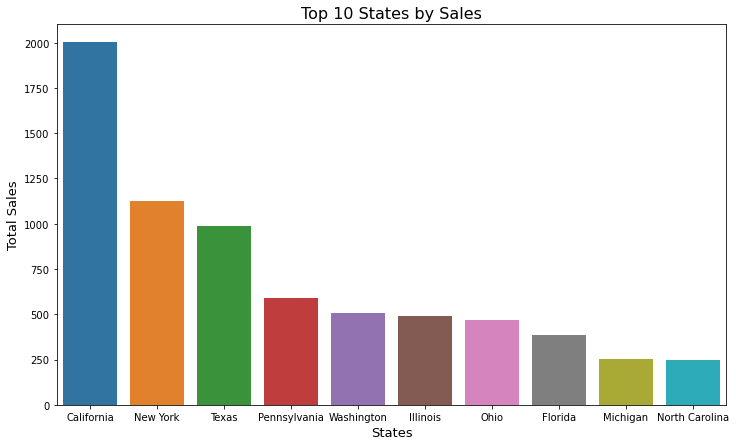

In [18]:
plt.figure(figsize=(12,7))
sns.countplot(x=df.State,order=(df.State.value_counts().head(10)).index)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("Top 10 States by Sales",fontsize =16)
plt.show()

# Top 10 States by Profit:
'California', 'New York', 'Washington', 'Michigan', 'Virginia','Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'

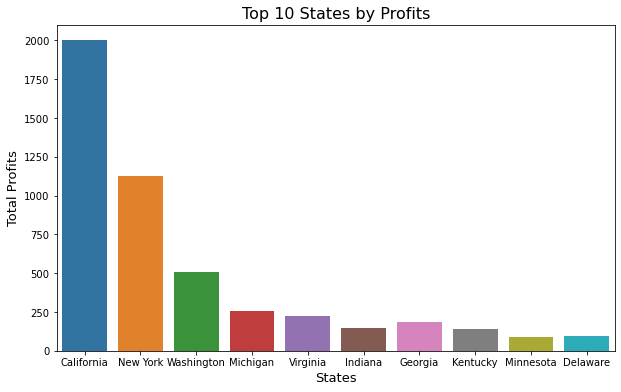

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.State,order=Top_10_Profits.index)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Profits",fontsize =13)
plt.title("Top 10 States by Profits",fontsize =16)
plt.show()

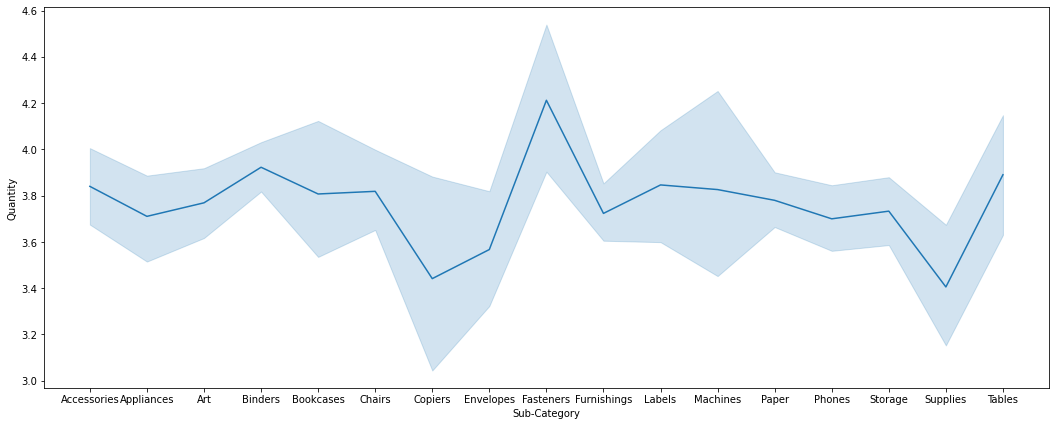

In [20]:
plt.figure(figsize=(18,7))
sns.lineplot(x='Sub-Category',y='Quantity',data=df,legend='brief')

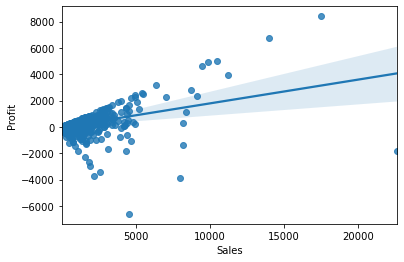

In [27]:
#regression plot
sns.regplot(df['Sales'],df['Profit'])


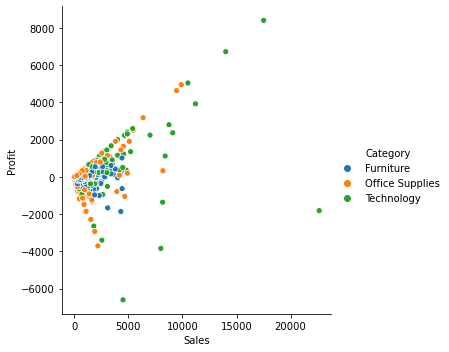

In [29]:
#Rel_plot with respect category
sns.relplot(x='Sales',y='Profit',hue='Category',data=df)

<Figure size 1296x504 with 0 Axes>

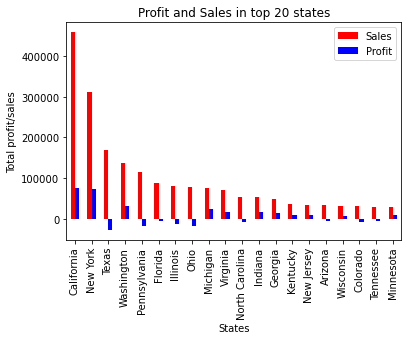

In [21]:
plt.figure(figsize=(18,7))
state=df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
state[:20].plot(kind='bar',color=['r','b'])
plt.title('Profit and Sales in top 20 states')
plt.xlabel('States')
plt.ylabel('Total profit/sales')
plt.show()

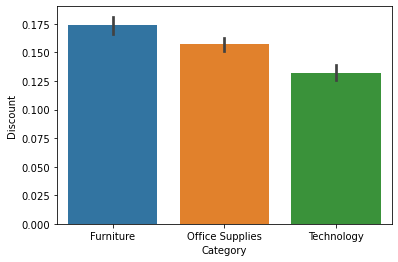

In [22]:
sns.barplot(y='Discount',x='Category',data=df)

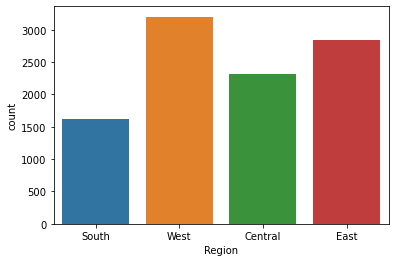

In [23]:
sns.countplot('Region',data=df)

#  Distrubution of Discounts across diffrent Sub Category

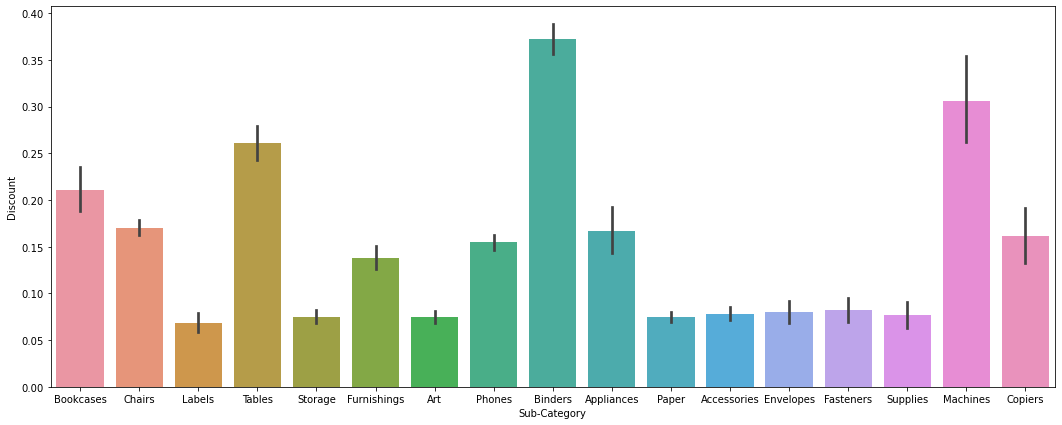

In [30]:

plt.figure(figsize=(18,7))
sns.barplot(x='Sub-Category',y='Discount',data=df)

#  Distrubution of Profits across diffrent regions

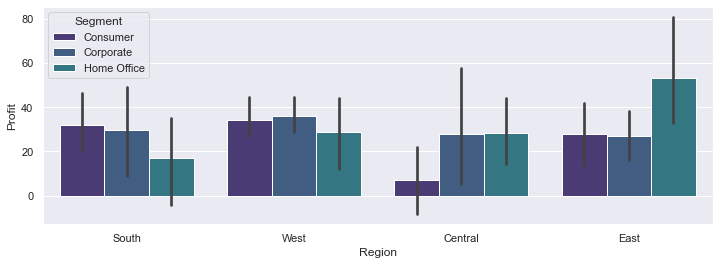

In [31]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = df, x = "Region",y = "Profit" ,hue = "Segment")
plt.show()


# Profit distribution by Region

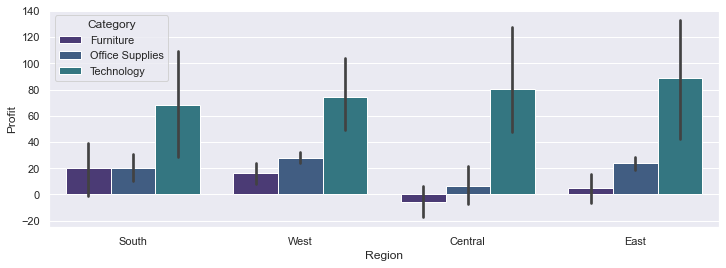

In [33]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = df , x = "Region",y = "Profit" ,hue = "Category")
plt.show()

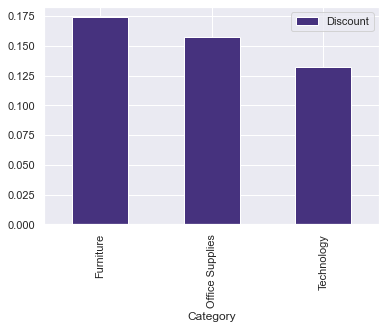

In [34]:
pivot=pd.pivot_table(df,index='Category',values='Discount')
pivot.plot(kind='bar')

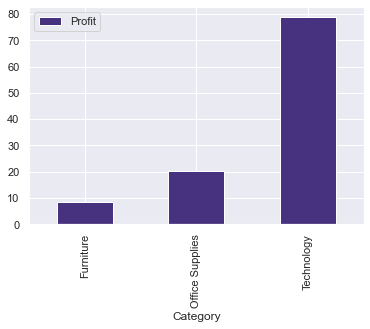

In [36]:
pivot=pd.pivot_table(df,index='Category',values='Profit')
pivot.plot(kind='bar')

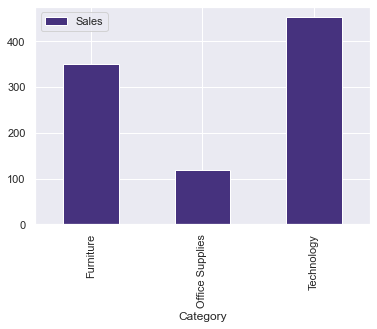

In [38]:
pivot=pd.pivot_table(df,index='Category',values='Sales')
pivot.plot(kind='bar')

# Conclusion

# From All these analysis we finally conclude that,
1) If we give more Discount on products our sales goes increses but Profit get down.


2) In Technology category business we get more Profit as compared to other two business.These is because of we given less Discount.


3) Here we also focus on our Office Supplies category business because sales of these category is less as compared to other two.


4) Also Sales in 'Fasteners','labels'and 'Art' category are so weak.so we have to concentrate on these sub-category businesses.


5) We have to concentrate on the Sales of 'West Virginia' State and 'San Luis Obispo' and 'Woodland' City.


6) To rise the profits , we first need to sell consumer segment products more .


7) For enhancing the profits , we need to sell more to the states which are liking our products¶ like NEWYORK and CALIFORNIA .
Hence To get good profit in any business you have to focus on increasing sales but not giving more discount

# Some useful insights that has been derived from this EDA.
1.We require some improvement for the same day of shiping mode.


2.We have to focus more in the South region to increase in our buisness and profit.

3.We also have to focus more on technology and Furniture category to make more revenue in the future.


4.Maximum number of superstores are in California and Newyork we have to focus more on other parts of the USA as well so that our buisness can grow more.



5.Profit and loss has a very weak relationship so we should keep this in mind before taking any decision related to buisness.


# The End